In [1]:
import os 
import cv2  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
 
import tensorflow as tf 
from tensorflow.keras import layers,models,optimizers 
from tensorflow import keras 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout 

from sklearn.utils import shuffle  
import random  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import load_model 
import imgaug.augmenters as iaa


In [32]:
dataset_path="D:\ML\Image Classification\Training"
img_size=250 
 
train_data=[] 
train_labels=[]  
train_paths=[]

##Iterate through the dataset 
for img_name in os.listdir(dataset_path): 

    if(img_name[ :3]=='not'): 
        img_class='notsmoking' 
    else:
        img_class='smoking' 
    train_labels.append(img_class) 
    img_path=os.path.join(dataset_path,img_name) 
    train_paths.append(img_path) 
    img = cv2.imread(img_path)  
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue  # skip this iteration if image not loaded
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    train_data.append([img,img_class])


   


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_8968\2046990827.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset_path="D:\ML\Image Classification\Training"


In [33]:
dataset_path="D:\ML\Image Classification\Testing"
img_size=250 
 
test_data=[] 
test_labels=[]  
test_paths=[]

##Iterate through the dataset 
for img_name in os.listdir(dataset_path): 

    if(img_name[ :3]=='not'): 
        img_class='notsmoking' 
    else:
        img_class='smoking' 
    test_labels.append(img_class) 
    img_path=os.path.join(dataset_path,img_name) 
    test_paths.append(img_path) 
    img=cv2.imread(img_path) 
    if img is None: 
        print(f"Failed to load image: {img_path}") 
        continue
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    test_data.append([img,img_class])


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_8968\688692814.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset_path="D:\ML\Image Classification\Testing"


DATA VISUALIZATION 


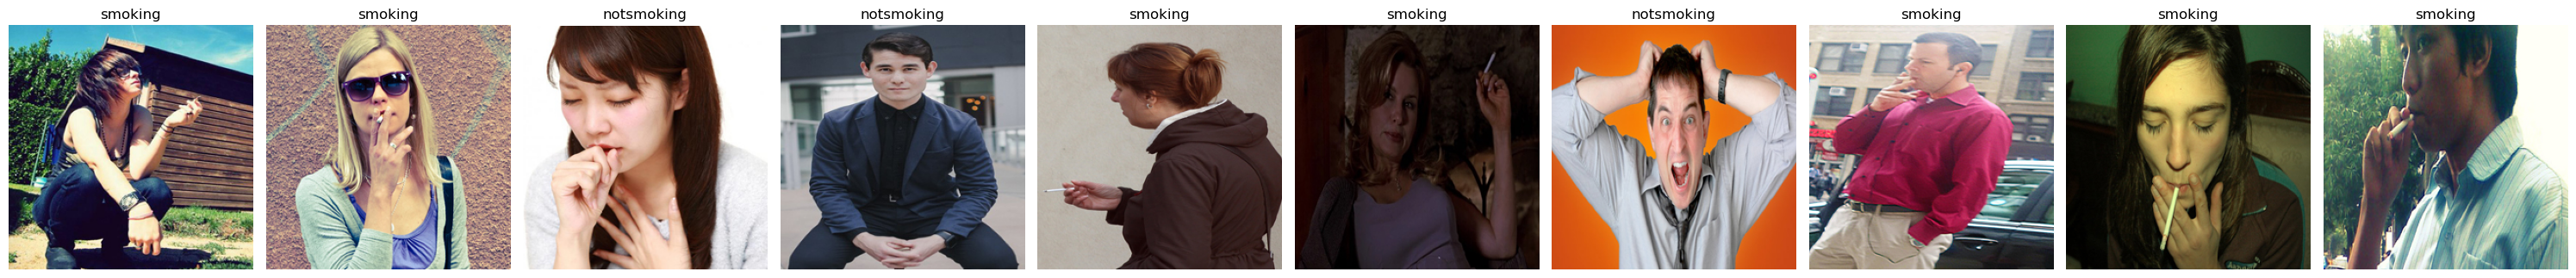

In [34]:
def display_random_images(images,labels,num_images=10): 
    num_total_images=len(images) 
    if num_total_images == 0:
        print("No images to display.")
        return 
    random_indices=np.random.choice(num_total_images,size=num_images,replace=False) 

    fig,axes=plt.subplots(1,num_images,figsize=(30,5))
    for i,idx in enumerate(random_indices): 
        axes[i].imshow(images[idx][0]) 
        axes[i].set_title(labels[idx]) 
        axes[i].axis('off') 
    plt.tight_layout() 
    plt.show() 
     
display_random_images(train_data,train_labels)


DATA PREPROCESSING

In [35]:
random.shuffle(train_data) 
random.shuffle(test_data) 


In [36]:
X_train, X_test, y_train, y_test = [], [], [], []

def extract_splits(data, target='train'):
    for features, label in data:
        if target == 'train':
            X_train.append(features)
            y_train.append(label)
        else:
            X_test.append(features)
            y_test.append(label)



In [37]:
extract_splits(train_data, target='train')



In [38]:
extract_splits(test_data, target='test')


In [39]:
X_train=np.array(X_train)  
X_test=np.array(X_test)
 
y_train=np.array(y_train) 
y_test=np.array(y_test)

In [40]:
print("X_train shape",X_train.shape)  
print("X_test shape",X_test.shape)  

print("y_train shape",y_train.shape)  
print("y_test shape",y_test.shape) 


X_train shape (716, 250, 250, 3)
X_test shape (224, 250, 250, 3)
y_train shape (716,)
y_test shape (224,)


In [ ]:
label_encoder=LabelEncoder() 
y_train_encoded=label_encoder.fit_transform(y_train) 
y_test_encoded=label_encoder.fit_transform(y_test) 

In [44]:
y_train_encoded

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

IMAGE AUGMENTATION

In [51]:
def display_seq_images(images,labels,num_images=5): 
    num_total_images=len(images) 
    fig,axes=plt.subplots(1,num_images,figsize=(30,5))
    for i,idx in enumerate(range(num_images)): 
      axes[i].imshow(images[idx],aspect='auto') 
      axes[i].set_title(labels[idx]) 
      axes[i].axis('off') 
    plt.tight_layout() 
    plt.show()

In [56]:
def augment_images(images,labels,num_augmentations=4): 
    augmented_images=[] 
    augmented_labels=[] 
     
    seq=iaa.Sequential([
        iaa.Fliplr(1.0),                        ##Horizontal flip with 100% probability 
        iaa.Multiply((1.5,2.5),per_channel=0.5)])    ##Adjust Saturation 
    
    ##Apply augmentation to each image  
    for original_image,label in zip(images,labels): 
        augmented_images.append(original_image) 
        augmented_labels.append(label) 

        augmented_images.extend(seq(images=[original_image]*(num_augmentations))) 
        augmented_labels.extend([label]*(num_augmentations)) 
    return np.array(augmented_images),np.array(augmented_labels) 

num_augmentations=4 
 
augmented_images,augmented_labels=augment_images(X_train,y_train_encoded,num_augmentations)

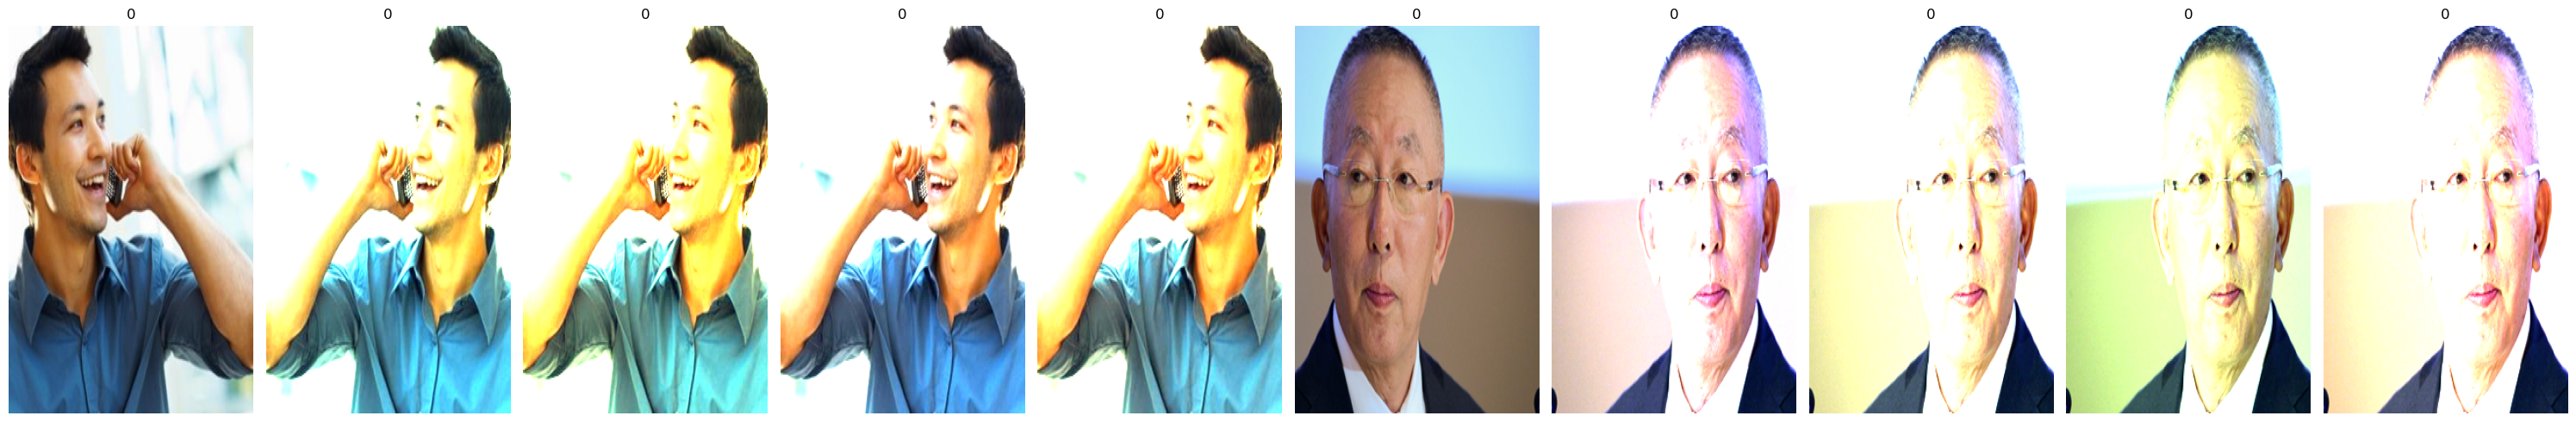

In [58]:
display_seq_images(augmented_images,augmented_labels,10)

Model Building 


In [61]:
preprocess_input=keras.applications.vgg19.preprocess_input 


In [63]:
img_shape=augmented_images[0].shape
base_model=keras.applications.VGG16( 
    input_shape=img_shape, 
    include_top=False, 
    weights="imagenet",
)
base_model.trainable=False 
base_model.summary()
  

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 250, 250, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 250, 250, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 62, 62, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [65]:
##Build model on top of the pre trained base 
model=models.Sequential([  
    base_model, 
    layers.GlobalAveragePooling2D(), 
    layers.Dropout(0.5), 
    layers.Dense(512,activation = 'relu'), 
    layers.Dropout(0.5), 
    layers.Dense(2,activation='softmax')
])

In [66]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model Training 

history=model.fit(augmented_images)